Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Yifei Fan"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings

%matplotlib inline


# HW 3:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    x=[x0]
    for n in range(N):
        x.append(g(x[n]))
        
    return x

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979,
                      0.79348036, 0.70136877])
x_true = 0.7390851332153119

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success!')

success!


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

$x^*=g(x^*)=1+x^*-(x^*)^2/M$

$\sqrt{M}=1+\sqrt{M}-1$

RHS=LHS, $x=\sqrt{M}$ is a fixed point of $g(x)$

$g(x^\ast + e_k)=x^\ast + e_{k+1} = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} +  O(e_k^3)$

$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}=(1-2/\sqrt{m})e_k$

It converges if $|1-2/\sqrt{m}|<1$, so it is not a stable iterative scheme.

20 iterations are needed to reducer the relative error to machine precision.

20


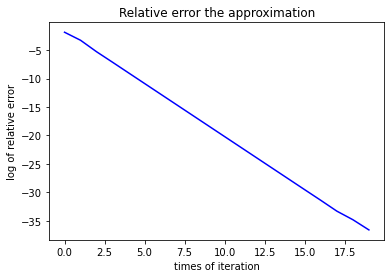

In [5]:
# Place plotting code here if needed

def gb(x):
    return 1+x-x*x/3.

eps=numpy.finfo(float).eps

N=range(100)
xstar=[]
for n in N:
    xstar.append(fixed_point(gb, 2, n)[-1])
    
re=[]
for xi in xstar:
    if numpy.abs(xi-numpy.sqrt(3))<eps:
        print(xstar.index(xi))
        break
    re.append(numpy.abs(xi-numpy.sqrt(3))/numpy.sqrt(3))
    

logre=numpy.log(re)
plt.plot(range(len(logre)), logre, color = 'blue') 
           
plt.title("Relative error the approximation") 
plt.xlabel("times of iteration") 
plt.ylabel("log of relative error") 
plt.show()  

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

$x^*=g(x^*)=M/x^*$

$\sqrt{M}=\sqrt{M}$

RHS=LHS, $x=\sqrt{M}$ is a fixed point of $g(x)$

$g(x^\ast + e_k)=x^\ast + e_{k+1} = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} +  O(e_k^3)$

$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}=(-1)e_k$

It will not converges since |-1|=1.

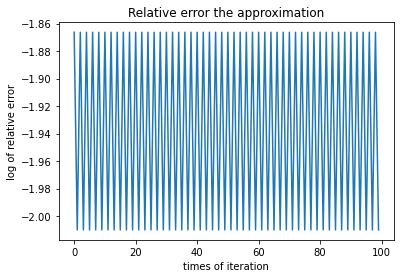

In [6]:
# Place plotting code here if needed

def gc(x):
    return 3./x

N=range(100)
xstar=[]
for n in N:
    xstar.append(fixed_point(gc, 2, n)[-1])
    
re=[]
for xi in xstar:
    if numpy.abs(xi-numpy.sqrt(3))<eps:
        print(xstar.index(xi))
        break
    re.append(numpy.abs(xi-numpy.sqrt(3))/numpy.sqrt(3))
    

logre=numpy.log(re)
plt.plot(range(len(logre)), logre) 
           
plt.title("Relative error the approximation") 
plt.xlabel("times of iteration") 
plt.ylabel("log of relative error") 
plt.show()  

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f'}$$

with $$ f = x^2 - M$$

$x^*=g(x^*)=x^*-((x^*)^2-M)/2(x^*)^2$

$x^*=x^*$

RHS=LHS, $x=\sqrt{M}$ is a fixed point of $g(x)$

$g(x^\ast + e_k)=x^\ast + e_{k+1} = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} +  O(e_k^3)$

$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}=\frac{e_k^2}{2 \sqrt{m}}$

It converges if $|\frac{1}{2\sqrt{m}}|<1$, so it is not a stable iterative scheme.

4 iterations are needed to reducer the relative error to machine precision.

4


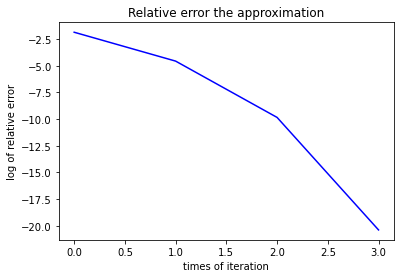

In [7]:
# Place plotting code here if needed

def gd(x):
    return x/2+3/(x*2)


N=range(100)
xstar=[]
for n in N:
    xstar.append(fixed_point(gd, 2, n)[-1])
    
re=[]
for xi in xstar:
    if numpy.abs(xi-numpy.sqrt(3))<eps:
        print(xstar.index(xi))
        break
    re.append(numpy.abs(xi-numpy.sqrt(3))/numpy.sqrt(3))
    

logre=numpy.log(re)
plt.plot(range(len(logre)), logre, color = 'blue') 
           
plt.title("Relative error the approximation") 
plt.xlabel("times of iteration") 
plt.ylabel("log of relative error") 
plt.show()  

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [8]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles

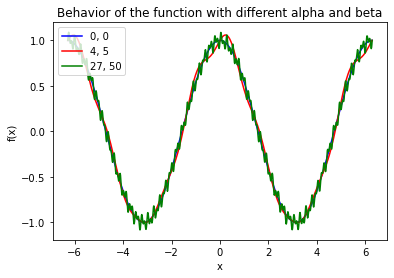

In [9]:
A=0.05
x = numpy.linspace(-2*numpy.pi, 2*numpy.pi, 1000)
a=0
b=0
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

plt.plot(x, f(x), color = 'blue',label="0, 0") 

a=4
b=5
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

plt.plot(x, f(x), color = 'red',label="4, 5") 

a=27
b=50
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

plt.plot(x, f(x), color = 'green',label="27, 50") 
           
plt.title("Behavior of the function with different alpha and beta") 
plt.xlabel("x") 
plt.ylabel("f(x)") 
plt.legend(loc="upper left")
plt.show()  

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [10]:
A=0.05
a=0
b=0
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

f_prime=lambda x, A=A, a=a, b=b: \
        -numpy.sin(x) + A * (a*numpy.cos(a*x) +b*numpy.cos(b*x))

from  rootfinding_optimization_schemes import bisection
from  rootfinding_optimization_schemes import secant
from scipy.optimize import root_scalar

x0=0.2
x1=2.

[xstar,history]=bisection(f,x0,x1)

print("bisection(0, 0): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

[xstar,history]=newton(f,f_prime,x0)

print("newton(0, 0): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

[xstar,history]=secant(f,x0,x1)

print("secant(0, 0): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

sol=root_scalar(f,  bracket=[x0, x1], method='brentq')

print("brentq(0, 0): x*= {} , f(x*)= {} , number of iterations = {}\n" .format(sol.root, f(sol.root), sol.iterations))

a=4.
b=5.

f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

f_prime=lambda x, A=A, a=a, b=b: \
        -numpy.sin(x) + A * (a*numpy.cos(a*x) +b*numpy.cos(b*x))

[xstar,history]=bisection(f,x0,x1)

print("bisection(4, 5): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

[xstar,history]=newton(f,f_prime,x0)

print("newton(4, 5): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

[xstar,history]=secant(f,x0,x1)

print("secant(4, 5): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

sol=root_scalar(f,  bracket=[x0, x1], method='brentq')

print("brentq(4, 5): x*= {} , f(x*)= {} , number of iterations = {}\n" .format(sol.root, f(sol.root), sol.iterations))

a=27
b=50

f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

f_prime=lambda x, A=A, a=a, b=b: \
        -numpy.sin(x) + A * (a*numpy.cos(a*x) +b*numpy.cos(b*x))

[xstar,history]=bisection(f,x0,x1)

print("bisection(27, 50): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

[xstar,history]=newton(f,f_prime,x0)

print("newton(27, 50): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

[xstar,history]=secant(f,x0,x1)

print("secant(27, 50): x*= {} , f(x*)= {} , number of iterations = {}" .format(xstar, f(xstar), len(history)))

sol=root_scalar(f,  bracket=[x0, x1], method='brentq')

print("brentq(27, 50): x*= {} , f(x*)= {} , number of iterations = {} \n" .format(sol.root, f(sol.root), sol.iterations))

bisection(0, 0): x*= 1.570796775817871 , f(x*)= -4.490229742968679e-07 , number of iterations = 20
newton(0, 0): x*= 4.71238898038469 , f(x*)= -1.8369701987210297e-16 , number of iterations = 5
secant(0, 0): x*= 1.5707963267998242 , f(x*)= -4.927552640156338e-12 , number of iterations = 6
brentq(0, 0): x*= 1.5707963267948966 , f(x*)= 6.123233995736766e-17 , number of iterations = 7

bisection(4, 5): x*= 1.6304405212402344 , f(x*)= 1.9620940002601506e-07 , number of iterations = 18
newton(4, 5): x*= -14.096326236971352 , f(x*)= 6.931560738582254e-08 , number of iterations = 5
secant(4, 5): x*= 1.6304406749277849 , f(x*)= 6.13728728740548e-08 , number of iterations = 7
brentq(4, 5): x*= 1.630440744880973 , f(x*)= -2.983724378680108e-16 , number of iterations = 8

bisection(27, 50): x*= 1.5567201137542725 , f(x*)= -3.49143903736332e-08 , number of iterations = 22
newton(27, 50): x*= 1.556720103515459 , f(x*)= -3.413055948975341e-11 , number of iterations = 138
secant(27, 50): x*= 1.556720

**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

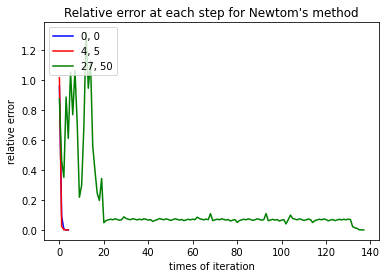

In [11]:
A=0.05
a=0
b=0
x0=0.2
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

f_prime=lambda x, A=A, a=a, b=b: \
        -numpy.sin(x) + A * (a*numpy.cos(a*x) +b*numpy.cos(b*x))

[xstar,history]=newton(f,f_prime,x0)

n=range(len(history))
re=[]
for x in history:
    re.append(numpy.abs(x-xstar)/numpy.abs(xstar))
    
plt.plot(n, re, color = 'blue',label="0, 0") 

a=4.
b=5.
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

f_prime=lambda x, A=A, a=a, b=b: \
        -numpy.sin(x) + A * (a*numpy.cos(a*x) +b*numpy.cos(b*x))

[xstar,history]=newton(f,f_prime,x0)

n=range(len(history))
re=[]
for x in history:
    re.append(numpy.abs(x-xstar)/numpy.abs(xstar))
    
plt.plot(n, re, color = 'red',label="4, 5") 

a=27
b=50
f = lambda x, A=A, a=a, b=b: \
        numpy.cos(x) + A * (numpy.sin(a*x) +numpy.sin(b*x))

f_prime=lambda x, A=A, a=a, b=b: \
        -numpy.sin(x) + A * (a*numpy.cos(a*x) +b*numpy.cos(b*x))

[xstar,history]=newton(f,f_prime,x0)

n=range(len(history))
re=[]
for x in history:
    re.append(numpy.abs(x-xstar)/numpy.abs(xstar))
    
plt.plot(n, re, color = 'green',label="27, 50") 


plt.title("Relative error at each step for Newtom's method") 
plt.xlabel("times of iteration") 
plt.ylabel("relative error") 
plt.legend(loc="upper left")
plt.show()  

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

Newton's method convergence the fastest in general, but it is bad when dealing with a fucntion with obvious noices. This is because noices have great impact on the behavior of f_prime so the performence of Newton's method become bad when noice get greater. Other methods are stable with different noices, but the bisection appear to be the method that needs the most iterations to get a good result. This is because bisection convergence linearly.

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [12]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Use NewSafe method to find a root x of the function f. 
    This method first try to find a solution using Newton's method, 
    but if predicts a solution outside the bracket, it then use bisection method to solve the problem.
        
    
    Parameters:
    -----------
    
    f: function (float)
        function giving f(x)
    f_prime:  function (float)
        function giving derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    MAX_STEPS = max_steps
    
    x=(a+b)/2.
    x_array = [ x0 ]
    newton=0
    for k in range(1, MAX_STEPS + 1):
        x = x  - f(x) / f_prime(x)
        if x>b or x<a:
            warnings.warn('Newton exceeds the bracket')
            newton=1
            break
        x_array.append(x)
        if numpy.abs(f(x)) < tol:
            break
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    if newton==1:
        xstar,history=bisection(f,a,b,tol = tol, max_steps=max_steps)
        return xstar, 0, len(history)
    
    return x, len(numpy.array(x_array)),0


In [13]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 4, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884993615406993,    N_n = 0, N_b = 21
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106136647446174,    N_n = 0, N_b = 21
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 4, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473185405760344,    N_n = 0, N_b = 20
brentq   = 1.1473182519138232,    N   = 9

no bracket: f(a) and f(b) must have different signs
succ

<ipython-input-12-ccbd09dbec28>:49: UserWarning: Newton exceeds the bracket
  warnings.warn('Newton exceeds the bracket')


## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


Let $g(n)=\log_x ((n+1)!) + \log_x (\epsilon_{mach}) - 1\approx (n+1) log_x (n+1) + \log_x (\epsilon_{mach})-n-2$ be the fixed point problem, and use secant method to solve it.

Since $log_x$ is not defined when x=1, $g(n)=n log(n) + log(\epsilon_{mach})$ when x=1

There are obvious errors between numerical solutions and simpler estimate. This is because the simpler estimate only guarantee the upper bound of n when n is large.

In [14]:

x=0.1
g=lambda n: (n+1)*numpy.log(n+1) / numpy.log(x) +numpy.log(eps) / numpy.log(x)-n-2
[nstar,history]=secant(g,1,1000)
print("numerical solution for x = 0.1 : ", nstar)
print("simpler estimate for x = 0.1 : ", numpy.exp(1)*x)
print("relative error for x = 0.1 : ", numpy.abs(nstar-numpy.exp(1)*x)/nstar, "\n")

x=1.
g=lambda n: n*numpy.log(n) +numpy.log(eps)
[nstar,history]=secant(g,1,1000)
print("numerical solution for x = 1 : ", nstar)
print("simpler estimate for x = 1 : ", numpy.exp(1)*x)
print("relative error for x = 1 : ", numpy.abs(nstar-numpy.exp(1)*x)/nstar, "\n")

x=10.
g=lambda n: (n+1)*numpy.log(n+1) / numpy.log(x) +numpy.log(eps) / numpy.log(x)-n-2
[nstar,history]=secant(g,1,1000)
print("numerical solution for x = 10 : ", nstar)
print("simpler estimate for x = 10 : ", numpy.exp(1)*x)
print("relative error for x = 10 : ", numpy.abs(nstar-numpy.exp(1)*x)/nstar, "\n")

x=100.
g=lambda n: (n+1)*numpy.log(n+1) / numpy.log(x) +numpy.log(eps) / numpy.log(x)-n-2
[nstar,history]=secant(g,1,1000)
print("numerical solution for x = 100 : ", nstar)
print("simpler estimate for x = 100 : ", numpy.exp(1)*x)
print("relative error for x = 100 : ", numpy.abs(nstar-numpy.exp(1)*x)/nstar, "\n")

x=709.
g=lambda n: (n+1)*numpy.log(n+1) / numpy.log(x) +numpy.log(eps) / numpy.log(x)-n-2
[nstar,history]=secant(g,1,1000)
print("numerical solution for x = 709 : ", nstar)
print("simpler estimate for x = 709 : ", numpy.exp(1)*x)
print("relative error for x = 709 : ", numpy.abs(nstar-numpy.exp(1)*x)/nstar, "\n")

x=1000.
g=lambda n: (n+1)*numpy.log(n+1) / numpy.log(x) +numpy.log(eps) / numpy.log(x)-n-2
[nstar,history]=secant(g,1,1000)
print("numerical solution for x = 1000 : ", nstar)
print("simpler estimate for x = 1000 : ", numpy.exp(1)*x)
print("relative error for x = 1000 : ", numpy.abs(nstar-numpy.exp(1)*x)/nstar, "\n")


numerical solution for x = 0.1 :  6.754936700053681
simpler estimate for x = 0.1 :  0.27182818284590454
relative error for x = 0.1 :  0.959758589174678 

numerical solution for x = 1 :  13.751206725985138
simpler estimate for x = 1 :  2.718281828459045
relative error for x = 1 :  0.802324124520475 

numerical solution for x = 10 :  31.518335120665046
simpler estimate for x = 10 :  27.18281828459045
relative error for x = 10 :  0.1375553886167042 

numerical solution for x = 100 :  134.10357881872463
simpler estimate for x = 100 :  271.8281828459045
relative error for x = 100 :  1.0270017045059625 

numerical solution for x = 709 :  749.4204915453876
simpler estimate for x = 709 :  1927.261816377463
relative error for x = 709 :  1.5716694941223677 

numerical solution for x = 1000 :  1041.0782801683188
simpler estimate for x = 1000 :  2718.2818284590453
relative error for x = 1000 :  1.611025395726785 

